In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization,Dropout,GlobalAveragePooling2D, MaxPooling1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.applications import EfficientNetB0

import numpy as np
from glob import glob

In [2]:
batch = 32
img_height = 180
img_width = 180

train_path = 'C:/Users/athul/Downloads/IP J comp/Train'
test_path = 'C:/Users/athul/Downloads/IP J comp/Test'

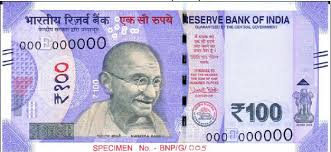

In [3]:
import PIL, pathlib
train_path = pathlib.Path(train_path)
onehundred = list(train_path.glob('1Hundrednote/*'))
PIL.Image.open(str(onehundred[5]))

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                train_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch)
print(train_ds)

Found 153 files belonging to 7 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
#  validation_split=0.1,
 # subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch)

Found 42 files belonging to 7 classes.


In [6]:
class_names = train_ds.class_names
print(train_ds)
print(class_names)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
['1Hundrednote', '2Hundrednote', '2Thousandnote', '5Hundrednote', 'Fiftynote', 'Tennote', 'Twentynote']


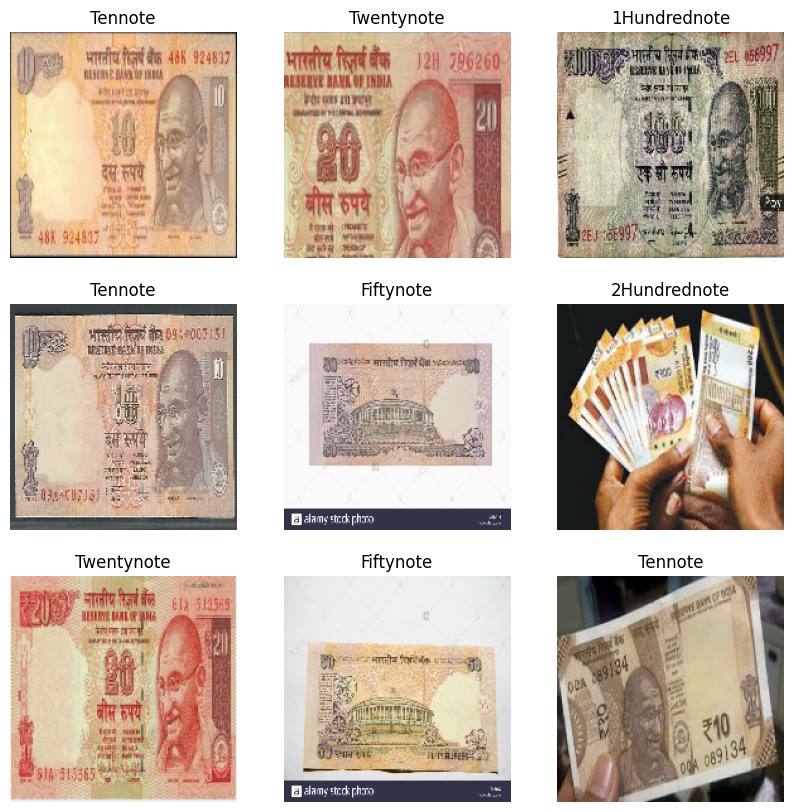

In [7]:
#Data Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [9]:
#normalize data by using a rescaling layer

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0072503127 1.0


In [10]:
Classifier=Sequential()

Classifier.add(layers.experimental.preprocessing.Rescaling(1./255,
      input_shape=(img_height, img_width, 3)))

Classifier.add(Conv2D(32,(3,3),
                      input_shape=(img_height,img_width,3), 
                      activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [11]:
Classifier.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 59168)             0

In [13]:
from PIL import _imaging
from PIL import Image
#fit the classifier
epochs = 30
r = Classifier.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
)

Epoch 1/30


C:\Users\athul\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 4s 708ms/step - loss: 7.0720 - accuracy: 0.0915 - val_loss: 2.8197 - val_accuracy: 0.1429
Epoch 2/30
5/5 [==============================] - 3s 572ms/step - loss: 2.2486 - accuracy: 0.1765 - val_loss: 1.9312 - val_accuracy: 0.1667
Epoch 3/30
5/5 [==============================] - 3s 550ms/step - loss: 1.7658 - accuracy: 0.4183 - val_loss: 1.7770 - val_accuracy: 0.1905
Epoch 4/30
5/5 [==============================] - 3s 529ms/step - loss: 1.3708 - accuracy: 0.4967 - val_loss: 1.5991 - val_accuracy: 0.4762
Epoch 5/30
5/5 [==============================] - 3s 508ms/step - loss: 1.0603 - accuracy: 0.6601 - val_loss: 1.3908 - val_accuracy: 0.5238
Epoch 6/30
5/5 [==============================] - 3s 509ms/step - loss: 0.5924 - accuracy: 0.8954 - val_loss: 1.1509 - val_accuracy: 0.5952
Epoch 7/30
5/5 [==============================] - 3s 529ms/step - loss: 0.4083 - accuracy: 0.9216 - val_loss: 1.4561 - val_accuracy: 0.5952
Epoch 8/30
5/5 [===============

In [14]:
mean_val = (sum(r.history['val_accuracy']))/(len(r.history['val_accuracy']))
print('mean_test_accuracy: ', mean_val)

mean_test_accuracy:  0.557142865161101


In [15]:
mean_train = (sum(r.history['accuracy']))/(len(r.history['accuracy']))
print('mean_train_accuracy: ', mean_train)

mean_train_accuracy:  0.8854030517240365


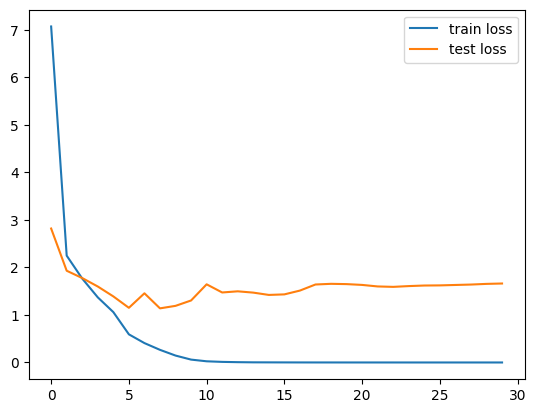

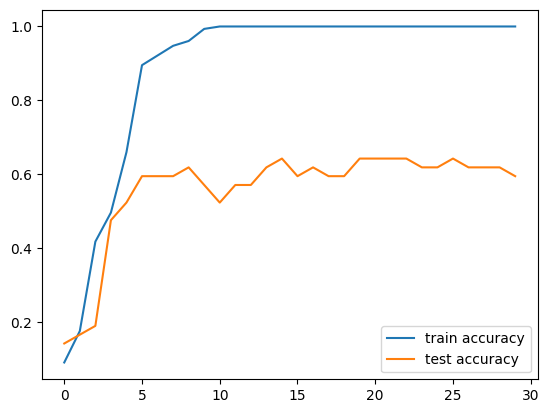

In [16]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

In [17]:
#Data Augmentation to reduce overfitting

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [18]:
Classifier=Sequential()

Classifier.add(data_augmentation)
Classifier.add(layers.experimental.preprocessing.Rescaling(1./255,
      input_shape=(img_height, img_width, 3)))

Classifier.add(Conv2D(32,(3,3),
                      input_shape=(img_height,img_width,3), 
                      activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(layers.Dropout(0.2))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [19]:
Classifier.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

In [21]:
epochs = 30
r = Classifier.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/30
5/5 [==============================] - 6s 540ms/step - loss: 3.8862 - accuracy: 0.0719 - val_loss: 2.2269 - val_accuracy: 0.1429
Epoch 2/30
5/5 [==============================] - 3s 587ms/step - loss: 2.0094 - accuracy: 0.1307 - val_loss: 1.9386 - val_accuracy: 0.1429
Epoch 3/30
5/5 [==============================] - 3s 604ms/step - loss: 1.9312 - accuracy: 0.1373 - val_loss: 1.8998 - val_accuracy: 0.2143
Epoch 4/30
5/5 [==============================] - 3s 573ms/step - loss: 1.8750 - accuracy: 0.1699 - val_loss: 1.8308 - val_accuracy: 0.3333
Epoch 5/30
5/5 [==============================] - 3s 536ms/step - loss: 1.7827 - accuracy: 0.3072 - val_loss: 1.7262 - val_accuracy: 0.3333
Epoch 6/30
5/5 [==============================] - 4s 758ms/step - loss: 1.6904 - accuracy: 0.3529 - val_loss: 1.4931 - val_accuracy: 0.3810
Epoch 7/30
5/5 [==============================] - 3s 587ms/step - loss: 1.5362 - accuracy: 0.4314 - val_loss: 1.2822 - val_accuracy: 0.5238
Epoch 8/30
5/5 [====

In [22]:
mean_val = (sum(r.history['val_accuracy']))/(len(r.history['val_accuracy']))
print('mean_test_accuracy: ', mean_val)
print('\n')
mean_train = (sum(r.history['accuracy']))/(len(r.history['accuracy']))
print('mean_train_accuracy: ', mean_train)

mean_test_accuracy:  0.5230158771077792


mean_train_accuracy:  0.7015250630676746


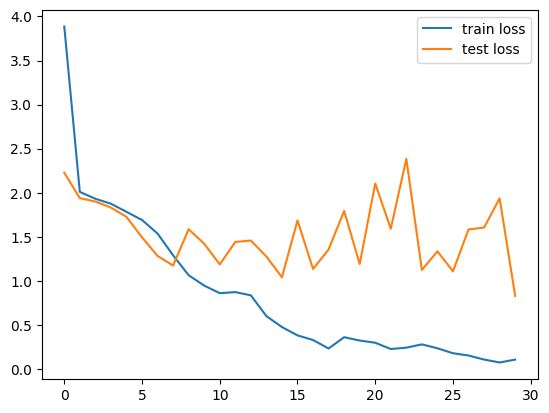

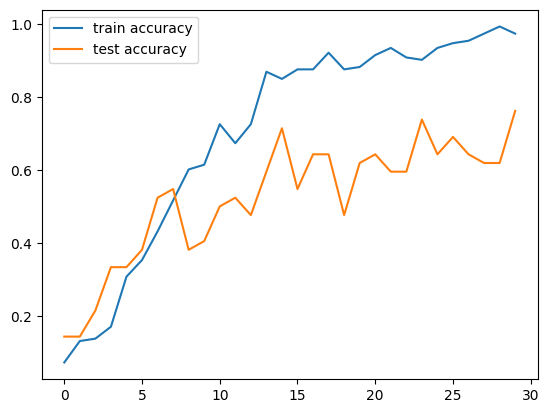

In [23]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

In [24]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(180,180,3))

Classifier=Sequential()

Classifier.add(effnet)

Classifier.add(GlobalAveragePooling2D())

Classifier.add(Flatten())

Classifier.add(Dense(512,activation='relu'))
Classifier.add(Dense(128,activation='relu'))

Classifier.add(Dense(64,activation='relu'))
Classifier.add(Dense(32,activation='relu'))

Classifier.add(Dropout(0.5))

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [28]:
Classifier.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
Classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 6, 6, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                      

In [31]:
from PIL import _imaging
from PIL import Image
#fit the classifier
epochs = 30
r = Classifier.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
)

Epoch 1/30
5/5 [==============================] - 18s 4s/step - loss: 1.9327 - accuracy: 0.1634 - val_loss: 1.9092 - val_accuracy: 0.3095
Epoch 2/30
5/5 [==============================] - 16s 3s/step - loss: 1.8345 - accuracy: 0.2484 - val_loss: 1.8474 - val_accuracy: 0.3571
Epoch 3/30
5/5 [==============================] - 17s 4s/step - loss: 1.6647 - accuracy: 0.3595 - val_loss: 1.7681 - val_accuracy: 0.3095
Epoch 4/30
5/5 [==============================] - 16s 3s/step - loss: 1.4449 - accuracy: 0.3987 - val_loss: 1.6112 - val_accuracy: 0.3810
Epoch 5/30
5/5 [==============================] - 16s 3s/step - loss: 1.2831 - accuracy: 0.5490 - val_loss: 1.4819 - val_accuracy: 0.4048
Epoch 6/30
5/5 [==============================] - 16s 3s/step - loss: 1.1109 - accuracy: 0.6340 - val_loss: 1.3935 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 19s 4s/step - loss: 0.8280 - accuracy: 0.6928 - val_loss: 1.2842 - val_accuracy: 0.5714
Epoch 8/30
5/5 [==================

In [32]:
mean_val = (sum(r.history['val_accuracy']))/(len(r.history['val_accuracy']))
print('mean_test_accuracy: ', mean_val)

mean_test_accuracy:  0.7039682537317276


In [33]:
mean_train = (sum(r.history['accuracy']))/(len(r.history['accuracy']))
print('mean_train_accuracy: ', mean_train)

mean_train_accuracy:  0.797385628024737


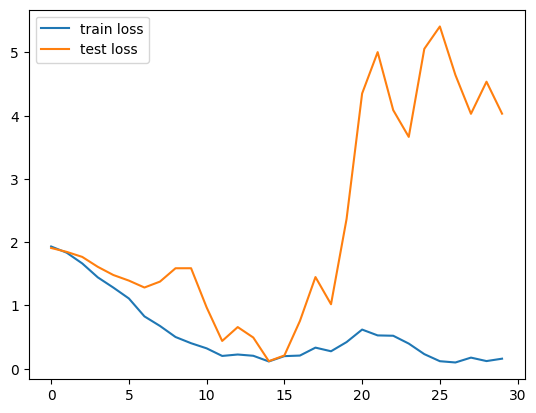

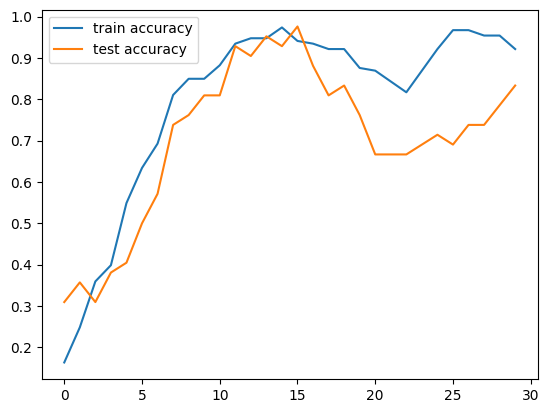

In [34]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

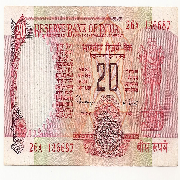

In [35]:
#Use classifier to run prediction on any new image

from tensorflow.keras.preprocessing import image
img = image.load_img('C:/Users/athul/Downloads/IP J comp/PI/2.jpg',
                       target_size=(img_height,img_width))
img

In [36]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(Classifier.predict(test_image), axis=1)
result

1/1 [==============================] - 1s 1s/step


array([6], dtype=int64)

In [37]:
prediction = class_names[result[0]]
prediction

'Twentynote'